## Setup
- 1. Create a new repository: public, Add a README file, Add .gitgnore: python
- 2. Open in github desktop, choose clone. File should cloned in my data. 
- 3. Tap Pipenv shell in terminal 
- 4. Push to github: pipfile init 
- 5. In terminal: pipenv install numpy pandas seaborn matplotlib openpyxl
- 6. In terminal: pipenv install ipykernel 
- 7. Under Pipfile, it shows the packages and their versions that installed. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Intro till Pandas
- Series object
- DataFrame object

In [2]:
import pandas as pd

data = dict(AI = 25, NET = 30, APP = 27, Java = 23)
#data  #{'AI': 25, 'NET': 30, 'APP': 27, 'Java': 23}
series = pd.Series(data=data)
series

AI      25
NET     30
APP     27
Java    23
dtype: int64

In [3]:
data1={'AI': [25, 24], 'Net': [30, 28], 'APP': [27, 26], 'Java':[25,23] }
series1=pd.Series(data1)
series1
df1=pd.DataFrame(data1)
df1

,AI,Net,APP,Java
0,25,30,27,25
1,24,28,26,23


In [4]:
data1['AI']

[25, 24]

In [5]:
df1['AI']

0    25
1    24
Name: AI, dtype: int64

In [6]:
df1[['AI', 'Net']]

,AI,Net
0,25,30
1,24,28


In [7]:
df1.loc[0, ['AI', 'Net']]

AI     25
Net    30
Name: 0, dtype: int64

In [8]:
df1.loc[[0,1], ['AI', 'Net']]

,AI,Net
0,25,30
1,24,28


In [9]:
df1.loc[0:1, ['AI', 'Net']]
#.loc 0:1 includes row 1

,AI,Net
0,25,30
1,24,28


In [10]:
df1.shape

(2, 4)

In [11]:
df1.columns

Index(['AI', 'Net', 'APP', 'Java'], dtype='object')

In [12]:
df1['AI'].value_counts()

25    1
24    1
Name: AI, dtype: int64

In [13]:
df1.iloc[0:1, [0, 2]]
#.iloc 0:1 does not include row 1

,AI,APP
0,25,27


In [14]:
df1.iloc[0:2, 0:3]

,AI,Net,APP
0,25,30,27
1,24,28,26


In [15]:
data2 = dict(AI = "25", NET = 30, APP = 27, Java = 23)
series2 = pd.Series(data=data2)
series2

AI      25
NET     30
APP     27
Java    23
dtype: object

In [16]:
# extracting values
print(f"series[0]: {series[0]}")
print(f"series[-1]: {series[-1]}")

# extracting keys
print(f"series.keys: {series.keys()}")
print(f"series.keys[-2]: {series.keys()[-2]}")

series[0]: 25
series[-1]: 23
series.keys: Index(['AI', 'NET', 'APP', 'Java'], dtype='object')
series.keys[-2]: APP


## DataFrame

In [17]:
pf = pd.DataFrame(series)
#print(pf)
pf

,0
AI,25
NET,30
APP,27
Java,23


In [18]:
pf = pd.DataFrame(series, columns=("Number students",))  #"," is compulsory
#print(pf)
pf

,Number students
AI,25
NET,30
APP,27
Java,23


In [19]:
languages = pd.Series(dict(AI="Python", NET ="C#", APP="Kotlin", Java="JAVA"))
df = pd.DataFrame({"Students":series, "Language":languages})
df

,Students,Language
AI,25,Python
NET,30,C#
APP,27,Kotlin
Java,23,JAVA


In [20]:
df.index # komma åt index

Index(['AI', 'NET', 'APP', 'Java'], dtype='object')

## Data selection

In [21]:
df.Students   # gets a Series with attribute-approach, risk finns if the key is sum

AI      25
NET     30
APP     27
Java    23
Name: Students, dtype: int64

In [22]:
df["Students"]  # gets a Series with dictionary-keys approach (__getitem__())

AI      25
NET     30
APP     27
Java    23
Name: Students, dtype: int64

In [23]:
# multiple columns
df[["Language", "Students"]]

,Language,Students
AI,Python,25
NET,C#,30
APP,Kotlin,27
Java,JAVA,23


In [24]:
df[df['Students']>=20]

,Students,Language
AI,25,Python
NET,30,C#
APP,27,Kotlin
Java,23,JAVA


In [25]:
# wants to get all rows > 24 students
print(df["Students"] > 24)  # __gt__()
# this is operation (operate overloading), faster than looping  

# masking
large_groups = df[df["Students"]>24]  # picked out all rows that are True. evaluating the bool series.
large_groups

AI       True
NET      True
APP      True
Java    False
Name: Students, dtype: bool


,Students,Language
AI,25,Python
NET,30,C#
APP,27,Kotlin


In [26]:
large_groups.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, AI to APP
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Students  3 non-null      int64 
 1   Language  3 non-null      object
dtypes: int64(1), object(1)
memory usage: 72.0+ bytes


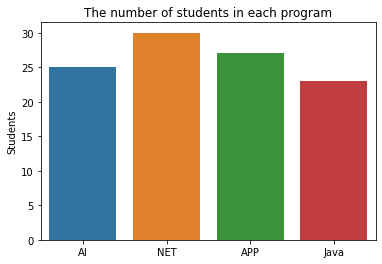

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=df, x=df.index, y='Students')
plt.title('The number of students in each program');

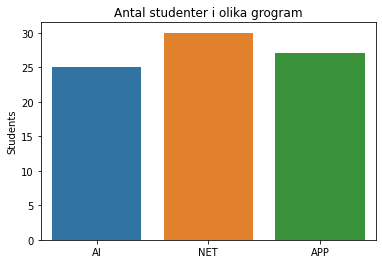

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=large_groups, x=large_groups.index, y="Students")
plt.title("Antal studenter i olika grogram"); #Utan ";", ska printa Text(0.5, 1.0, 'Antal studenter i olika grogram')
#sns set tile can aslo be used instead of matplotlib

In [29]:
# Read Excel
import pandas as pd
calories = pd.read_excel("../Data/calories.xlsx")
calories.head(3)

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ


In [30]:
calories.iloc[3:8]  # index of locations: on rows!

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ
5,CannedFruit,Canned Cranberries,100g,178 cal,748 kJ
6,CannedFruit,Canned Crushed Pineapple,100g,53 cal,223 kJ
7,CannedFruit,Canned Figs,100g,107 cal,449 kJ


In [31]:
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FoodCategory      2225 non-null   object
 1   FoodItem          2225 non-null   object
 2   per100grams       2225 non-null   object
 3   Cals_per100grams  2225 non-null   object
 4   KJ_per100grams    2225 non-null   object
dtypes: object(5)
memory usage: 87.0+ KB


In [32]:
calories.describe() # gives statistics on dataframe

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
count,2225,2225,2225,2225,2225
unique,44,1993,2,524,524
top,BakingIngredients,Roast Beef,100g,100 cal,420 kJ
freq,95,4,1802,26,26


In [33]:
calories["FoodCategory"].unique()

array(['CannedFruit', 'Fruits', 'Tropical&ExoticFruits', 'PotatoProducts',
       'Vegetables', 'FastFood', 'Pizza', 'Cheese', 'CreamCheese',
       'Milk&DairyProducts', 'SlicedCheese', 'Yogurt', 'Beef&Veal',
       'ColdCuts&LunchMeat', 'Meat', 'Offal&Giblets', 'Pork',
       'Poultry&Fowl', 'Sausage', 'Venison&Game', 'Cakes&Pies',
       'Candy&Sweets', 'IceCream', '(Fruit)Juices',
       'AlcoholicDrinks&Beverages', 'Beer',
       'Non-AlcoholicDrinks&Beverages', 'Soda&SoftDrinks', 'Wine',
       'CerealProducts', 'Oatmeal,Muesli&Cereals', 'Pasta&Noodles',
       'Dishes&Meals', 'Soups', 'Legumes', 'Nuts&Seeds', 'Oils&Fats',
       'VegetableOils', 'BakingIngredients', 'Fish&Seafood',
       'Herbs&Spices', 'Pastries,Breads&Rolls', 'Sauces&Dressings',
       'Spreads'], dtype=object)

In [34]:
calories["FoodCategory"].value_counts()

BakingIngredients                95
Cakes&Pies                       91
Herbs&Spices                     90
Beer                             85
Candy&Sweets                     81
Pastries,Breads&Rolls            78
Dishes&Meals                     78
Oatmeal,Muesli&Cereals           76
FastFood                         72
Vegetables                       63
Legumes                          62
Fish&Seafood                     60
Fruits                           54
Sauces&Dressings                 54
Cheese                           53
Soups                            52
Non-AlcoholicDrinks&Beverages    51
AlcoholicDrinks&Beverages        48
Sausage                          47
(Fruit)Juices                    46
Meat                             46
IceCream                         45
Soda&SoftDrinks                  45
CerealProducts                   44
Pizza                            43
Pasta&Noodles                    40
Yogurt                           40
Nuts&Seeds                  

In [35]:
calories.columns

Index(['FoodCategory', 'FoodItem', 'per100grams', 'Cals_per100grams',
       'KJ_per100grams'],
      dtype='object')

In [36]:
calories["per100grams"].unique()

array(['100g', '100ml'], dtype=object)

In [37]:
calories["per100grams"].value_counts()

100g     1802
100ml     423
Name: per100grams, dtype: int64

In [38]:
calories["per100grams"].value_counts(normalize=True)

100g     0.809888
100ml    0.190112
Name: per100grams, dtype: float64

## Data cleaning

- convert string to int
- change column names
- seperate liquids and solids

In [39]:
calories

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ
...,...,...,...,...,...
2220,Spreads,Sunflower Butter,100g,617 cal,2591 kJ
2221,Spreads,Tapenade,100g,233 cal,979 kJ
2222,Spreads,Unsalted Butter,100g,717 cal,3011 kJ
2223,Spreads,Vegemite,100g,180 cal,756 kJ


In [40]:
calories.rename({'Cals_per100grams': "Calories", 'per100grams': "per100"}, axis="columns")

,FoodCategory,FoodItem,per100,Calories,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ
...,...,...,...,...,...
2220,Spreads,Sunflower Butter,100g,617 cal,2591 kJ
2221,Spreads,Tapenade,100g,233 cal,979 kJ
2222,Spreads,Unsalted Butter,100g,717 cal,3011 kJ
2223,Spreads,Vegemite,100g,180 cal,756 kJ


In [41]:
calories = calories.rename(dict(Cals_per100grams = "Calories", per100grams="per100"), axis="columns")  # default will rename the rows, not columns

#.rename, .replace, .reset_index

In [42]:
calories.head()

,FoodCategory,FoodItem,per100,Calories,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [43]:
calories.tail()

,FoodCategory,FoodItem,per100,Calories,KJ_per100grams
2220,Spreads,Sunflower Butter,100g,617 cal,2591 kJ
2221,Spreads,Tapenade,100g,233 cal,979 kJ
2222,Spreads,Unsalted Butter,100g,717 cal,3011 kJ
2223,Spreads,Vegemite,100g,180 cal,756 kJ
2224,Spreads,Wild Honey,100g,286 cal,1201 kJ


In [44]:
calories["Calories"] = calories["Calories"].str[:-3].astype(int)
calories["Calories_test"] = calories["Calories"].astype(int)
calories.head()


,FoodCategory,FoodItem,per100,Calories,KJ_per100grams,Calories_test
0,CannedFruit,Applesauce,100g,62,260 kJ,62
1,CannedFruit,Canned Apricots,100g,48,202 kJ,48
2,CannedFruit,Canned Blackberries,100g,92,386 kJ,92
3,CannedFruit,Canned Blueberries,100g,88,370 kJ,88
4,CannedFruit,Canned Cherries,100g,54,227 kJ,54


.astype(), .dtypes

In [45]:
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   FoodCategory    2225 non-null   object
 1   FoodItem        2225 non-null   object
 2   per100          2225 non-null   object
 3   Calories        2225 non-null   int32 
 4   KJ_per100grams  2225 non-null   object
 5   Calories_test   2225 non-null   int32 
dtypes: int32(2), object(4)
memory usage: 87.0+ KB


In [46]:
calories["per100"].value_counts()

100g     1802
100ml     423
Name: per100, dtype: int64

In [47]:
solids = calories[calories["per100"] == "100g"] # Bool series
liquids = calories[calories["per100"] == "100ml"]
liquids.head()

,FoodCategory,FoodItem,per100,Calories,KJ_per100grams,Calories_test
409,Milk&DairyProducts,Almond Milk,100ml,17,71 kJ,17
410,Milk&DairyProducts,Buttermilk,100ml,62,260 kJ,62
412,Milk&DairyProducts,Coconut Milk,100ml,230,966 kJ,230
422,Milk&DairyProducts,Hot Chocolate,100ml,89,374 kJ,89
423,Milk&DairyProducts,Kefir,100ml,55,231 kJ,55


In [48]:
solids.head()

,FoodCategory,FoodItem,per100,Calories,KJ_per100grams,Calories_test
0,CannedFruit,Applesauce,100g,62,260 kJ,62
1,CannedFruit,Canned Apricots,100g,48,202 kJ,48
2,CannedFruit,Canned Blackberries,100g,92,386 kJ,92
3,CannedFruit,Canned Blueberries,100g,88,370 kJ,88
4,CannedFruit,Canned Cherries,100g,54,227 kJ,54


## Find top 5 categoreis with highest calories

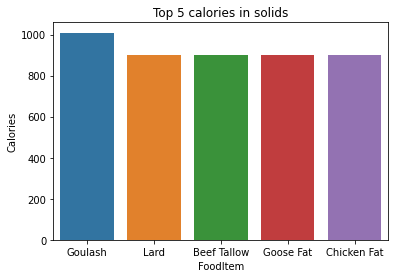

In [49]:
top_5 = solids.sort_values(by='Calories', ascending=False).head()
sns.barplot(data=top_5, x='FoodItem', y='Calories')
plt.title('Top 5 calories in solids');

In [50]:
solids_top5 = solids.sort_values(by="Calories", ascending=False).head()

In [51]:
liquids_top5 = liquids.sort_values(by="Calories", ascending=False).head()
liquids_top5

,FoodCategory,FoodItem,per100,Calories,KJ_per100grams,Calories_test
1751,Oils&Fats,Cod Liver Oil,100ml,1000,4200 kJ,1000
1808,VegetableOils,Wheat Germ Oil,100ml,929,3902 kJ,929
1800,VegetableOils,Salmon Oil,100ml,911,3826 kJ,911
1789,VegetableOils,Menhaden Oil,100ml,911,3826 kJ,911
1759,Oils&Fats,Herring Oil,100ml,902,3788 kJ,902


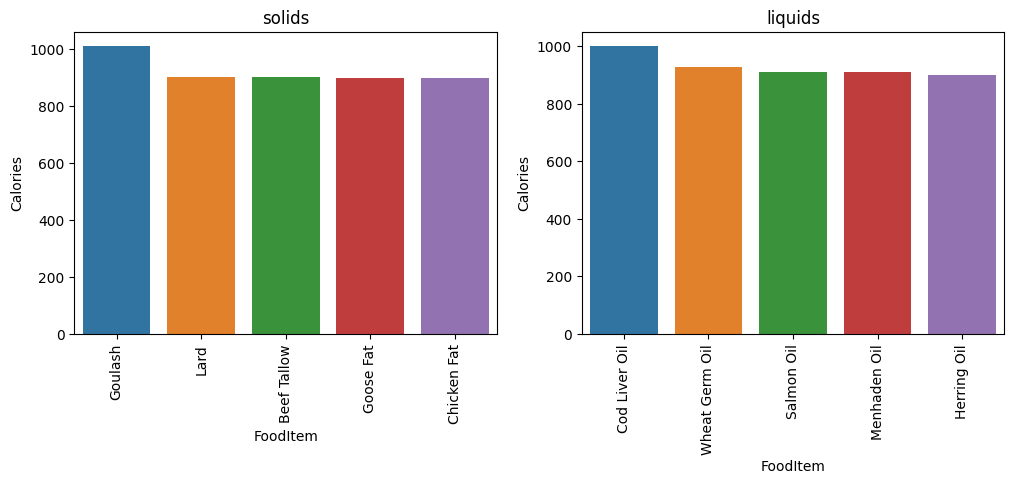

In [60]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, dpi=100, figsize=(12,4))
sns.barplot(data=solids_top5, x="FoodItem", y="Calories", ax=ax[0])
ax[0].set_title('solids')
ax[0].set_xticklabels(labels=ax[0].get_xticklabels(), rotation=90);
sns.barplot(data=liquids_top5, x="FoodItem", y="Calories", ax=ax[1])
ax[1].set_title('liquids')
ax[1].set_xticklabels(labels=ax[1].get_xticklabels(), rotation=90);
